# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs3/20250226_sparc4acs3_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs3/20250226_s4c3_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs3/20250226_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs3/20250226_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs3/20250226_s4c3_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:54.569000,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:55.689073,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:56.809145,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:57.929218,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-26T21:20:59.049291,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:46:52.987000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,8,L4,None,True
2352,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:48:55.341000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,9,L4,None,True
2353,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:50:57.723000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,10,L4,None,True
2354,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T06:53:00.372000,120.00000,12:38:16.18,-38:42:45.60,v1025cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,11,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs3/20250226_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   81R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   81R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   81R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   81R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   81R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

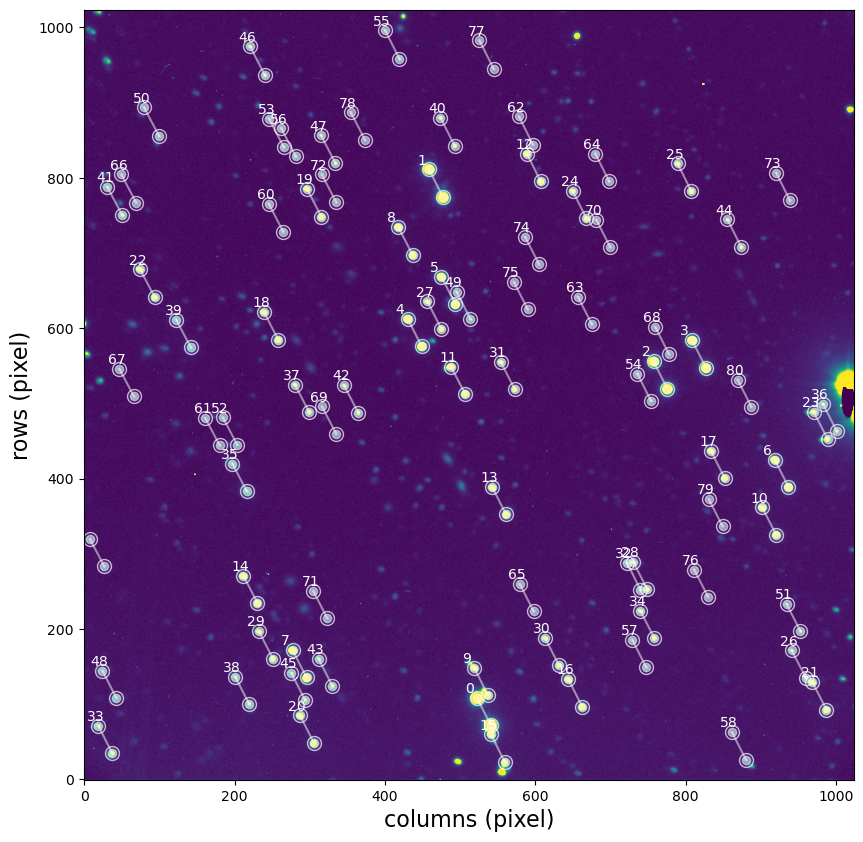

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553137,-38.759801,540.752529,71.967026,6.094425,6.094425,-10.644264,0.000836,-9.075293,0.000640,10,0
1,1,189.565008,-38.693567,477.228138,774.454787,5.478514,5.478514,-10.208878,0.001069,-9.059130,0.000563,10,0
2,2,189.527298,-38.716332,775.478367,519.678298,5.579724,5.579724,-9.939277,0.001269,-9.061596,0.000663,10,0
3,3,189.521247,-38.713440,826.751817,547.606865,5.508354,5.508354,-9.588763,0.001588,-9.063658,0.000651,10,0
4,4,189.567281,-38.712521,448.765609,576.216108,5.706112,5.706112,-8.981109,0.002395,-9.057846,0.000589,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,189.519115,-38.742254,829.626258,242.964788,5.935768,5.935768,-5.237873,0.056702,-9.066050,0.000532,10,0
77,77,189.557844,-38.677058,544.633802,944.785365,5.357068,5.357068,-5.004479,0.069159,-9.056882,0.000479,10,0
78,78,189.578033,-38.686893,373.743535,849.803316,5.309365,5.309365,-4.897783,0.076695,-9.056571,0.000514,10,0
79,79,189.517312,-38.733309,848.940113,336.647789,5.237798,5.237798,-4.903375,0.078562,-9.067360,0.000632,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

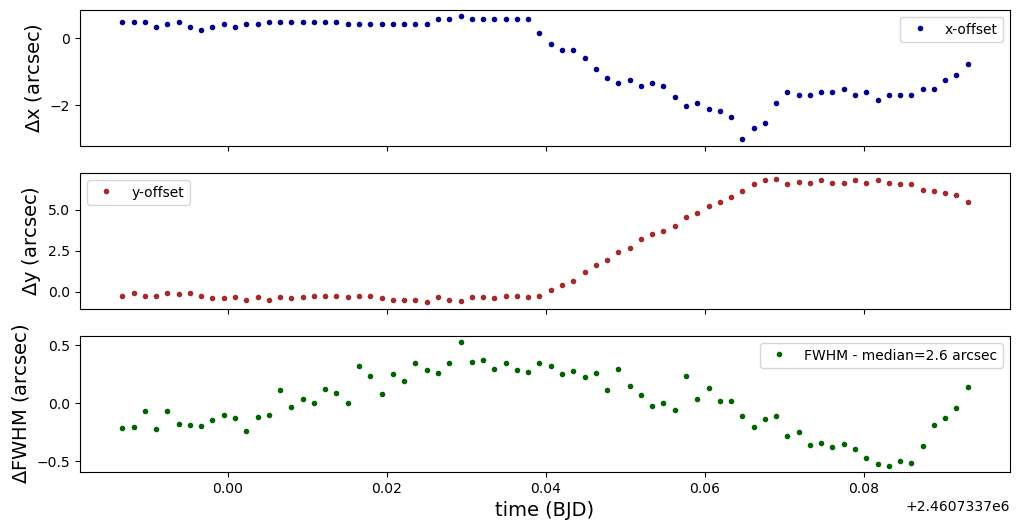

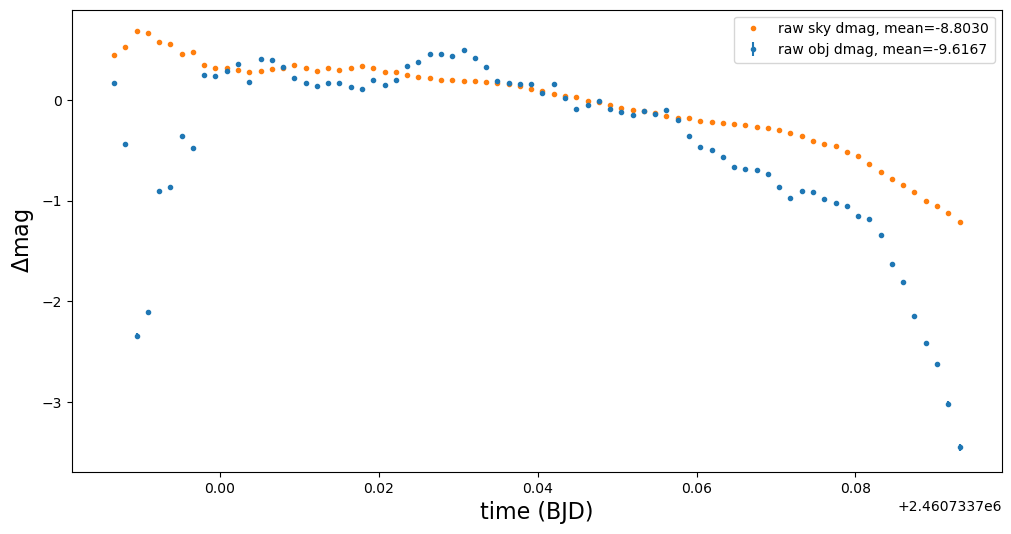

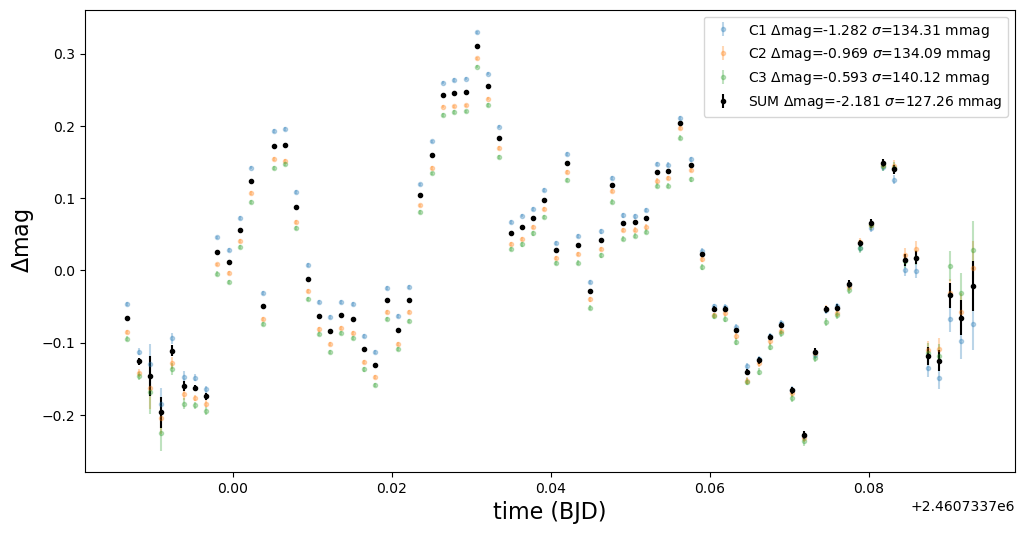

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
 2460733.686716362 439.4331775356613 ...  -0.06652431996613206
 2460733.688135538 439.4331775356613 ...  -0.12600345871163565
 2460733.689554019 439.4331775356613 ...  -0.14566102019524685
2460733.6909731254 438.9331775356613 ...  -0.19648676992107905
 2460733.692389917 439.1831775356613 ...   -0.1110623348100015
 2460733.693809128 439.4331775356613 ...  -0.15973224270065156
2460733.6952258497 438.9331775356613 ...  -0.16268367859667965
               ...               ... ...                   ...
2460733.7845803555 432.9331775356613 ...  0.014349220356387526
2460733.7859968683 432.9331775356613 ...   0.01770111513125272
2460733.7874159855 433.4331775356613 ...  -0.11831003934987638
2460733.7888322086 433.4331775356613 ...   -0.1250072517998646
 2460733.790248756 434.1831775356613 ...  -0.03450059371507397
 2460733.791668394 434.6831775356613 ...  -0.0653251424

In [8]:
catalog = 'CATALOG_PHOT_AP010'
target=4
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs3/20250226_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     483   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU    690   81R x 339C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0073', 'EFE0073', 'FO0074', 'EFO0074', 'FE0074', 'EFE0074', 'FO0075',
       'EFO0075', 'FE0075', 'EFE0075'],
      dtype='object', length=339)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:34:29,333 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:34:29,333 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:34:29,342 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-18 00:34:29,342 | INFO | Source index: i=4 


2025-09-18 00:34:29,343 root - INFO - Source RA=189.56728115918676 Dec=-38.71252109596165 mag=-14.2815+-0.0005  [pipeline_lib]


2025-09-18 00:34:29,343 | INFO | Source RA=189.56728115918676 Dec=-38.71252109596165 mag=-14.2815+-0.0005


2025-09-18 00:34:29,344 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-18 00:34:29,344 | INFO | Best aperture radius: 15.0 pixels


2025-09-18 00:34:29,345 root - INFO - Polarization in Q: -0.0048+-0.0008  [pipeline_lib]


2025-09-18 00:34:29,345 | INFO | Polarization in Q: -0.0048+-0.0008


2025-09-18 00:34:29,346 root - INFO - Polarization in U: -0.003+-0.001  [pipeline_lib]


2025-09-18 00:34:29,346 | INFO | Polarization in U: -0.003+-0.001


2025-09-18 00:34:29,347 root - INFO - Polarization in V: 0.0001+-0.0007  [pipeline_lib]


2025-09-18 00:34:29,347 | INFO | Polarization in V: 0.0001+-0.0007


2025-09-18 00:34:29,348 root - INFO - Total linear polarization p: 0.0055+-0.0009  [pipeline_lib]


2025-09-18 00:34:29,348 | INFO | Total linear polarization p: 0.0055+-0.0009


2025-09-18 00:34:29,349 root - INFO - Angle of polarization theta: 104+-5 deg  [pipeline_lib]


2025-09-18 00:34:29,349 | INFO | Angle of polarization theta: 104+-5 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:34:29,350 root - INFO - Free constant k: 0.8362943401125718+-0.0  [pipeline_lib]


2025-09-18 00:34:29,350 | INFO | Free constant k: 0.8362943401125718+-0.0


2025-09-18 00:34:29,351 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 00:34:29,351 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 00:34:29,352 root - INFO - RMS of zi residuals: 0.009492097657271272  [pipeline_lib]


2025-09-18 00:34:29,352 | INFO | RMS of zi residuals: 0.009492097657271272


2025-09-18 00:34:29,353 root - INFO - Reduced chi-square (n=76.0, DOF=73.0): 1.17  [pipeline_lib]


2025-09-18 00:34:29,353 | INFO | Reduced chi-square (n=76.0, DOF=73.0): 1.17


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:34:29,438 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:34:29,438 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:34:29,443 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:34:29,443 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:34:29,665 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:34:29,665 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:34:29,670 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:34:29,670 | INFO | Substituting symbol \perp from STIXGeneral


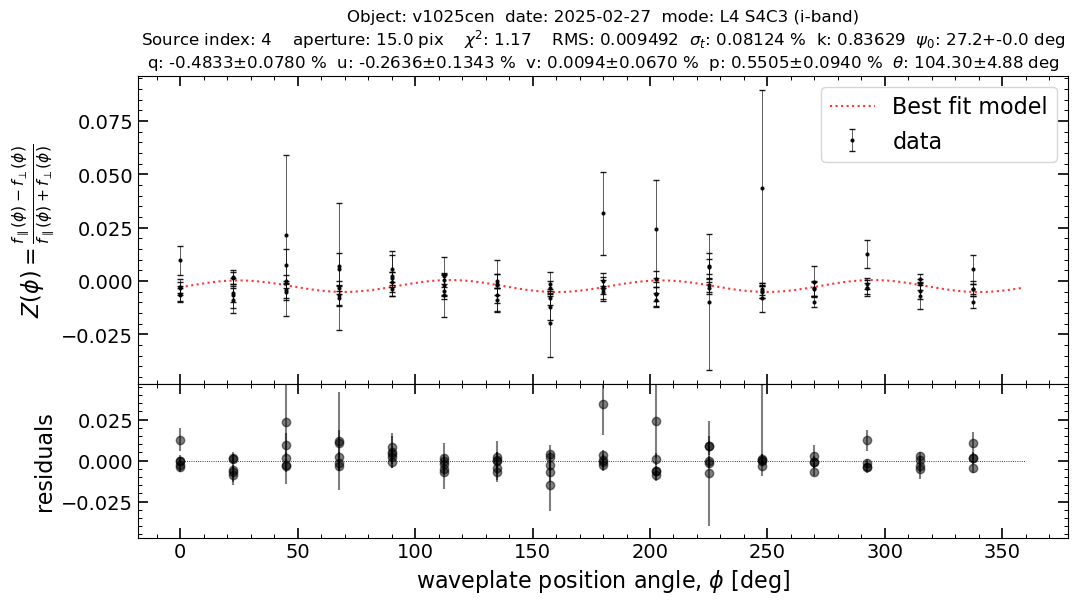

In [12]:
source_index = 4

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [13]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250226/sparc4acs3/20250226_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 4
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 5
APERTURE_RADIUS : 15.0
NEXPS : 76
MAG : -14.2815+-0.0005
RA : 189.56728115918676
DEC : -38.71252109596165
FWHM : 5.444182248184571
X1 : 430.1007461418884
Y1 : 612.6005808102209
X2 : 448.76560892943417
Y2 : 576.2161084616297
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5]
ZI : [-0.006+-0.004, -0.009+-0.006, 0.02+-0.04, ..., 0.02+-0.02, -0.01+-0.03,


And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [14]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.55+-0.09 %  Angle of polarization: 104+-5 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [15]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [16]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

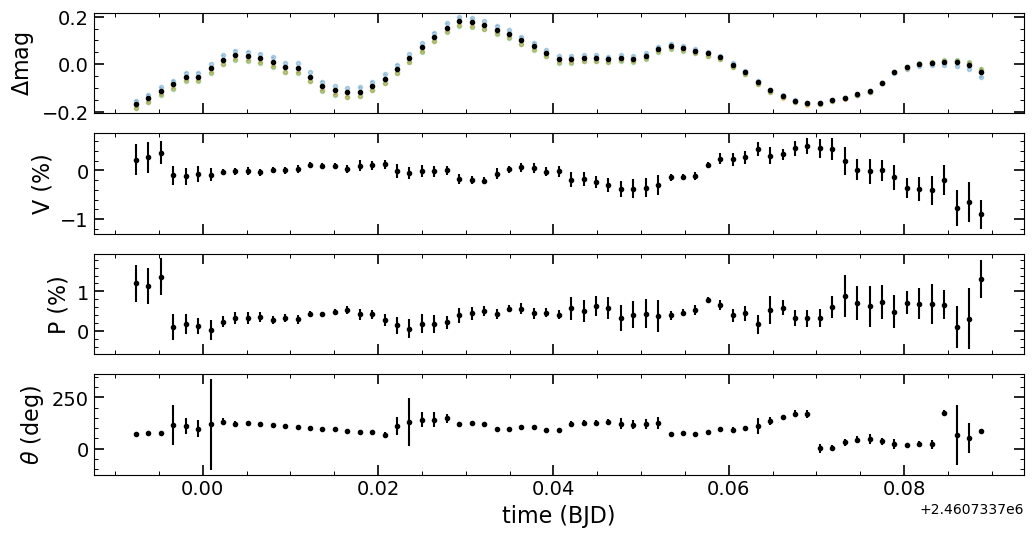

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.15341806515163725,0.002120088344241415,-0.18275315971212436,0.0021782496130467698,-0.18437147383451347,0.002295964045984162,2460733.692373934,430.1007461418884,612.6005808102209,448.76560892943417,576.2161084616297,5.068095832253774,-11.310568099577875,0.0020326487187296662,-13.620554339171571,0.001454652681336204,-0.16818538071565747,0.012047553762702506,0.004711068532672358,72.48942256168415,11.183727642001022
-0.12846278442728654,0.002073920863694752,-0.15739644478092707,0.002132936344522346,-0.1598122924775165,0.0022520187166736616,2460733.693792694,430.1007461418884,613.1005808102209,448.76560892943417,576.7161084616297,5.119013411260423,-11.332180132870501,0.001984449581260317,-13.617171632930168,0.0014519067040304199,-0.1431906411816275,0.011323854557302318,0.004562534112346315,75.73810891499312,11.523326704064528
-0.0972186231426857,0.001833939310372581,-0.12658248903393599,0.0018884878820434967,-0.13039620256197182,0.0019986546741413646,2460733.6952107353,430.1007461418884,612.6005808102209,448.76560892943417,576.2161084616297,5.173032747071569,-11.466019543079181,0.0017492980335577879,-13.720343108330784,0.0013206852579606863,-0.11252270637356432,0.0137445277511669,0.004621790290882992,77.3204134344008,9.617151255562877
-0.06970151942355152,0.0014790205833958752,-0.09942206217709781,0.001525468386364245,-0.10269974755227729,0.001618551171590585,2460733.6966298474,429.6007461418884,612.6005808102209,448.26560892943417,576.2161084616297,5.149617785138499,-11.696746897372643,0.0014050846240278977,-13.923629231295543,0.0011006703307184253,-0.08508147504486097,0.0009763744243841046,0.0033072892484547756,114.95290410738903,96.87725338102014
-0.036252444646803994,0.0012334229832259643,-0.06706072373284044,0.0012744066015468688,-0.07036038147408519,0.0013557175348065278,2460733.6980477963,429.8507461418884,613.1005808102209,448.51560892943417,576.7161084616297,5.149617785138499,-11.895440320788799,0.0011665380681745113,-14.08949806825924,0.0009492003383360141,-0.05225688859240307,0.0018548147667657522,0.002501170941027312,109.16794372691047,38.566378807795644
-0.03601387304000703,0.0011164923775355846,-0.06729543052156117,0.0011537511361925303,-0.0700643725774075,0.0012277256886254922,2460733.6994657973,430.1007461418884,612.8505808102209,448.76560892943417,576.4661084616297,5.149617785138499,-11.99945662044713,0.0010544798626332288,-14.193419404847852,0.0008655772280822646,-0.052161925522682395,0.001318957115853934,0.0019483657962301175,98.4650129136119,42.2479708417998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.01828562769739861,0.002130474962466634,-0.014101409676534615,0.00220803930999073,-0.012737450708000253,0.0023620134378019926,2460733.780311091,423.8507461418884,633.6005808102209,442.51560892943417,597.2161084616297,4.54780331075351,-10.83555510677989,0.0020138088257903642,-12.990768666115628,0.0016814251931100694,-0.0134127004576996,0.007191910931971625,0.0029618652285842476,17.976053913309613,11.778419718872527
-0.006672123914059469,0.002272518147910942,0.0,0.002356989423147596,0.003098972996742333,0.002526144010167372,2460733.781728576,423.8507461418884,633.1005808102209,442.51560892943417,596.7161084616297,4.538492717179337,-10.737833609139617,0.0021464223251420195,-12.879634468017656,0.0018110093980745897,0.0,0.006885954733105468,0.003956659302440418,23.196799826092377,16.433517273321108


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=4, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)